# Evaluating Mental Health Trends and Predictors among Students

## Phase 1: Data Preparation & Visualization

##### Group Name: 139
##### Group Members: Sothearaot Tat (s4058460) & Phuong Pham (s4078692)

---

## Table of Contents

- [Packages Installation & Importation](Packages-Installation-&-Importation)
- [1. Introduction](#1.-Introduction)
    - [1.1 Dataset Source](#1.1-Dataset-Source)
    - [1.2 Dataset Details](#1.2-Dataset-Details)
    - [1.3 Dataset Features](#1.3-Dataset-Features)
    - [1.4 Target Feature](#1.4-Target-Feature)
- [2. Goals & Objectives](#2.-Goals-&-Objectives)
- [3. Literature Review](#3.-Literature-Review)
- [4. Data Cleaning & Preprocessing](#4.-Data-Cleaning-&-Preprocessing)
- [5. Data Exploration & Visualisation](#5.-Data-Exploration-&-Visualisation)
    - [5.1 One-Variable Visualisation](#5.1-One-Variable-Visualisation)
    - [5.2 Two-Variable Visualisation](#5.2-Two-Variable-Visualisation)
    - [5.3 Three-Variable Visualisation](#5.3-Three-Variable-Visualisation)
- [6. Summary & Conclusion](#6.-Summary-&-Conclusion)
- [Reference](#Reference)

## Package Installation & Import

In [121]:
# Import packages
## Disable warning messages
import warnings
warnings.filterwarnings("ignore")

#Packages to import data from OpenML
import openml
from openml import datasets, tasks, runs, flows, config, study
from openml.datasets import edit_dataset, fork_dataset, get_dataset
from openml.tasks import TaskType
import arff

## Packages for data preprocessing
import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

## Packages for data visualizing
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

## 1. Introduction

### 1.1 Dataset Source

The Student Depression dataset was retrieved from OpenML (Jurado, 2025), showing their current condition and a set of potential features that may be the leading factors of the dependent variable. The latest update was in the begining of 2025, and data was gathered from Indian students.

### 1.2 Dataset Details

The datase refers to the mental health of students from different cities within India, which includes all information of participants regarding their demographic information, academic performance, lifestyle habits, and especially the mental health condition. This experiment was designed to analyze and then predict depression levels among students. Beside their characteristic attributes likes age, gender, city, degree, the evaluation also consider from their GPA performance in school, living behaviors such as sleeping pattern or dietary habits, and mental health indicators. To be specific, these indicators were collected through a questionnaire asking them to self-evaluate on a scale from 1 to 5 about not only their pressure and satisfaction level of their academic institutes or workplaces, but also their monetary strain to standardize the degree of depression.

Consisting of 18 features along with 27900 observations, each row represents an individual student and all corresponding information. The data type of rows vary from numeric integer and floating points, to nominal and ordinal categorical, especially, the depression level and suicidal thought are binary with 1 and 0 represent "yes" and "no".

First and foremost, the dataset was originally formated in arff file that require to load using a specific "arff" package, then convert into dataframe with numpy and pandas

In [129]:
#Read and import data
dataset = arff.loads(open('depress.arff', 'rt'))
data = np.array(dataset['data'])
columns = [attr[0] for attr in dataset['attributes']]

In [130]:
depress = pd.DataFrame(data, columns=columns)
depress.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.9,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [131]:
#import into csv
depress.to_csv('depress.csv', index=False)

### 1.3 Dataset Features

The below table displays the list of features within the dataset and the detail description for each of them. All the information is taken from the OpenML data source specified by the author of this experiment.

In [134]:
#Student Depression dataset feature
feature_depress = [['Name', 'Type', 'Units', 'Description'],
                   ['id', 'Numerical', 'N/A', 'the index of the students'],
                   ['gender', 'Norminal categorical', 'N/A', 'gender of the students'],
                    ['Age','Numerical','Year','the age of the student'],
                    ['City','Norminal categorical','N/A','students city of origin'],
                    ['Profession','Norminal categorical','N/A','students current occupation'],
                    ['Academic Pressure','Ordinal categorical','N/A','academic pressure rated out of 5'],
                    ['Work Pressure','Ordinal categorical','N/A','work pressure rated out of 5'],
                    ['CGPA','Numerical','N/A','Cumulative grade point average out of 10'],
                    ['Study Satisfaction','Ordinal categorical','N/A','satisfaction at school rated out of 5'],
                    ['Job Satisfaction','Ordinal categorical','N/A','satisfaction at work rated out of 5'],
                    ['Sleep Duration','Ordinal categorical','hours','sleep duration from 6 to more than 8 hours/others'],
                    ['Dietary Habits','Ordinal categorical','N/A','how healthy the students diet is'],
                    ['Degree','Norminal categorical','N/A','what degree the student is taking (BA/MA/High school)'],
                    ['Have you ever had suicidal thoughts ?','Norminal categorical','N/A','ask whether student has had suicidal thoughts (yes/no)'],
                    ['Work/Study Hours','Numerical','hours','hours that student works or studies'],
                    ['Financial Stress','Ordinal categorical','N/A','student financial stress rated out of 5'],
                    ['Family History of Mental Illness','Norminal categorical','N/A','ask whether theres history of mental illness in the family (yes/no)'],
                    ['Depression','Norminal categorical','N/A','determine if the student is depressed (yes/no)']]


print(tabulate(feature_depress, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════════════════════════════════════╤══════════════════════╤═════════╤═════════════════════════════════════════════════════════════════════╕
│ Name                                  │ Type                 │ Units   │ Description                                                         │
╞═══════════════════════════════════════╪══════════════════════╪═════════╪═════════════════════════════════════════════════════════════════════╡
│ id                                    │ Numerical            │ N/A     │ the index of the students                                           │
├───────────────────────────────────────┼──────────────────────┼─────────┼─────────────────────────────────────────────────────────────────────┤
│ gender                                │ Norminal categorical │ N/A     │ gender of the students                                              │
├───────────────────────────────────────┼──────────────────────┼─────────┼────────────────────────────────────────────────────────

### 1.4 Target Feature

This project focus on identifying the cause the mental health conditions of student in India and conducting a forecast on their psychological distress. The binary feature "depression" will be the dependent variable to be predicted based on other independent variables.

## 2. Goals & Objectives

Academic stress, anxiety and depression among students, especially those who attend college, became a serious cause of concern throughout the previous decades and was believed to continue in the future. In consequence, a proper model is fitted to the chosen dataset with a high predictability of the depression level that can practically support not only Indian community but also to every nation world-wide. Policymakers and administrators in education and healthcare, specifically mentioning Government's education, health and well-being departments, will be beneficial for applying the model's findings to allocate resources, modifications, and funding for initiatives. Educational institutions such as schools and universities could use the model to identify at-risk students and offer tailored mental health support program, while mental health professionals and counselors could leverage the insights to design more effective intevention strategies. Furthermore, student and their families could also gain more awareness of their children's conditions to provide prompt assistance.

As a result, the primary object is to utilize students' responses to the standardized depression scales to issue a forecast of which variables determine whether a student is likely to experience despression, thus enabling early identification of at-risk individuals. IN addition, the reliable predictive model is expected to identify the most significant predictors with the aim of offering insights to deal with those factors influencing despression risks among students. Secondly, the project is looked forward to conducting exploratory analyses on the basis of descriptive statistics and visualizations to evaluate the patterns and relationships existing in the dataset.

The Phase 1 is focusing on data cleaning and preprocessing to achieve a precise and transparent sample for further analysis in the upcoming phases. Data visualization will also be included in this phase to help explore the characteristics of dataset.

## 3. Literature Review

Various factors contribute to the feeling of anxiety and depression amongst students. Naturally, one can imagine the negative impact that depression symptions have on students performance, while the reverse may not always be true. Students who do not enjoy school may not show any symptoms of depression although their acedemic performance may be low. Many studies have found that depression has statistically significant negative impact on academic performance. Sinval, et al, (2024) found that while depression was insignificantly associated with GPA, it's indirect influence on GPA via academic performance was significant. Additionally, "higher levels of both depression and anxiety symptoms scores were associated with lower GPAs at baseline" (Awadalla, et al, 2020). Other studies also seem to suggest a non-mutual relationship between depression and academic performance - that is, depression affects subsequent performance but academic performance would not be a good predictor of depression. Hishinuma, et al (2023) found that the impact of GPA on the Weekly Center for Epidemiological Studies-Depression score was igorable. It would be interesting to see the relationship between depression and academic performance, specifically CGPA, in this study. While it is uncertain whether GPA will influence depression, it is clear that academic pressure impact depression. A study in 2022 (Deng, et al) found a significant beta of 0.293 for academic stress. Another study which reviewed 52 studies up to November 2022 (Steare, et al, 2023) found that 48 studies observed evidence of positive association between academic pressure and mental health outcome. Furthermore, in the same review, 17 out of 19 papers which studies depressive symptoms showed positive influence of academic pressure. Socio-economic features were also significantly related with depression. Using Neural network algorithms, Trivedi, et al (2022) was able to achieve 97.2% accuracy with socio-economic predictors such as age, sex and other financial related predictors. Using similar predictors, other studies found the same success of more than 90% accuracy (Sharif, et al, 2022; Rana & Kabir, 2023). Another study found 92.56% accuracy (Zulfikir, et al, 2021) using features that are similar in this analysis, including age, gender, education, profession, job satisfaction, financial stress and pressure, academic pressure, sleeping duration, apetite, as well as recent suicidal thoughts. In multiple studies (Tsuno, et al, 2005), more than half of individuals who are diagnosed with depression has poor sleep quality. On the other hand, location or place of orgin was not used as a predictor. While location may not directly infuence depression, it implies socio-economic status, particularly related to the socio-economic position. "The association between lower levels of SEP and higher likelihood of depression were most consistent with education, working status, financial difficulty, and subjective economic status." (Barrass, 2024). Hence, it may be justified to exclude this feature from the list of predictors. Concering education level, a twin study in 2015 (McFarland & Wagner) concluded that depression is negatively associated with college degree, suggesting that lower number of depressed highly educated students are to be observed. While this justify encoding various majors to their degree types, the fact that students in some majors may be more susceptible to feeling of anxiety and depression are ignored. However, it was shown that being in STEM or non-STEM (except for art and humanities) is not significantly associated with testing positive on Patient Health Questionaire (PHQ-9) scale (Ajinkya, et al, 2016). Long working hour is also associated with depression, with one study (Virtanen, 2011) finding 17% increase in the risk of depressive symptoms with every 10 hours increase in work. A study by Sprang, et al (2020) found that a Yes/No dichotomous family history (FH) indicator is not associated with polygenic risk score for major depression, outlining the fact that some characteristics of family mental illness history are more important than others. This causes concerns for the inclusion of family illness as a predictor in this current study. 

## 4. Data Cleaning & Preprocessing
This data cleaning and preprocessing step involves transforming data into a structured format for further analysis. The main highlight is to clean up all detected flaws such as missing values, duplicates or irrelevant features for maintaining data integrity. Eventually, the dataset will be sampled randomly to conduct descriptive analysis.

### Data Cleaning Steps
1. Dropping irrelevent columns
2. Checking the names and types of the variables, and modify as needed
3. Checking and dealing with missing value
4. Finding and dealing with duplicates
5. Sampling data

##### 1. Dropping irrelevent columns

In this dataset, the "ID" columns is unnecessary and has been excluded. It is because the feature show high uniqueness, which cause issues with generalization to intepret according analysis and visualization. "City" is also removed as location may not directly influence the degree of depression.

In [144]:
#Drop irrelevant variables (id & city)
depress = depress.drop(columns = ['id'])
depress = depress.drop(columns = ['City'])

In [145]:
depress.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.9,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


##### 2. Checking the names and types of the variables, and modify as needed

After dropping the irrelevant column, the below shows all the attributes in this dataset.

In [148]:
# Check variables' names
depress.columns

Index(['Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In spite of the fact that most of the columns name are labelled properly, some of them are in full sentence which may be problematic when doing referencing if the features are not written correctly. As a result, all columns are modified to be in lower case with removed white spaces before and after. All spaces are also replaced with underscore, achieving the consistency among all features. Specifically, for the two columns that are too lengthy, "Family History of Mental Illness" and "Have you ever had suicidal thoughts?", it is renamed to avoid cluttered block of codes. Readability, usability and efficiency are strongly highlighted.

In [150]:
# make column names lower case and also remove any white spaces
# before & after the column names using the strip() function
depress.columns = depress.columns.str.lower().str.strip()

columns_mapping = {
    'academic pressure': 'academic_pressure',
    'work pressure': 'work_pressure',
    'study satisfaction': 'study_satisfaction',
    'job satisfaction': 'job_satisfaction',
    'sleep duration': 'sleep_duration',
    'dietary habits': 'dietary_habits',
    'have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'work/study hours' : 'work_study_hrs',
    'financial stress' : 'financial_stress',
    'family history of mental illness' : 'family_mental_hist'
}

# rename columns
depress = depress.rename(columns = columns_mapping)
depress.sample(5, random_state=999)

,gender,age,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hrs,financial_stress,family_mental_hist,depression
6061,Male,23.0,Student,5.0,0.0,8.04,5.0,0.0,Less than 5 hours,Unhealthy,BSc,Yes,4.0,3.0,No,1
18316,Male,19.0,Student,4.0,0.0,8.21,1.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,11.0,2.0,No,1
24440,Male,22.0,Student,3.0,0.0,8.78,5.0,0.0,7-8 hours,Unhealthy,M.Com,No,3.0,1.0,Yes,0
20758,Female,19.0,Student,4.0,0.0,9.84,5.0,0.0,More than 8 hours,Unhealthy,Class 12,No,11.0,3.0,Yes,0
6036,Male,18.0,Student,2.0,0.0,6.04,5.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,0


For the data type checking, it can be easily observed that all the columns are not properly formatted into its intended data type since python considers all in object (string) type. Thus, the numeric features are converted into the correct type for data exploration process. 

In [152]:
# Check data type of each variable
print(f"Shape of the dataset = {depress.shape} \n")
depress.dtypes

Shape of the dataset = (27901, 16) 



gender                object
age                   object
profession            object
academic_pressure     object
work_pressure         object
cgpa                  object
study_satisfaction    object
job_satisfaction      object
sleep_duration        object
dietary_habits        object
degree                object
suicidal_thoughts     object
work_study_hrs        object
financial_stress      object
family_mental_hist    object
depression            object
dtype: object

Within this datasest, the conversion has been done with "age", "cgpa", and "work_study_hrs" to turn them into floating points. Even though "academic_pressure", "work_pressure", "study_satisfaction", "job_satisfaction", and "financial_stress" are seen in numbers, they are actually ordinal categorical data on the scale of 5, therefore, the default object types are kept.

In [154]:
#convert age, work_study_hrs to float
depress['age'] = pd.to_numeric(depress['age'], errors='coerce')
depress['work_study_hrs'] = pd.to_numeric(depress['work_study_hrs'], errors='coerce')
depress['cgpa'] = pd.to_numeric(depress['cgpa'], errors='coerce')

depress.dtypes

gender                 object
age                   float64
profession             object
academic_pressure      object
work_pressure          object
cgpa                  float64
study_satisfaction     object
job_satisfaction       object
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
work_study_hrs        float64
financial_stress       object
family_mental_hist     object
depression             object
dtype: object

The unique values for categorical features are shown to identify any observed data quality issues. The data seems to be clean without any white spaces or typo problems.

In [156]:
#checking categorical variables
categorical_var = depress.columns[depress.dtypes==object].tolist()

for var in categorical_var:
    unique_values = depress[var].unique()
    print(f'{len(unique_values)} unique values for ' + var)
    print(depress[var].unique())
    print('')

2 unique values for gender
['Male' 'Female']

14 unique values for profession
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

6 unique values for academic_pressure
[5.0 2.0 3.0 4.0 1.0 0.0]

3 unique values for work_pressure
[0.0 5.0 2.0]

6 unique values for study_satisfaction
[2.0 5.0 3.0 4.0 1.0 0.0]

5 unique values for job_satisfaction
[0.0 3.0 4.0 2.0 1.0]

5 unique values for sleep_duration
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']

4 unique values for dietary_habits
['Healthy' 'Moderate' 'Unhealthy' 'Others']

28 unique values for degree
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']

2 unique values for suicidal_thoughts
['Yes' 'No']

6 unique values 

Especially, for the degree column, the values are considered inconsistent and granulated. For example, those that starts with "B" and "M" are respectively "Bachelor" and "Master", will be converted to "BA" and "MA" to be consistent with others.

In [158]:
#Degree is too granulated, so we convert it to only BA, MA, and Year12
import re

depress['degree'] = depress['degree'].str.lower()

#replace
depress['degree'] = depress['degree'].str.replace(r'^b.*', 'BA', regex = True)
depress['degree'] = depress['degree'].str.replace(r'^m.*', 'MA', regex = True)
depress['degree'] = depress['degree'].str.replace(r'llb.*', 'BA', regex = True) #llb = bachelor of law
depress['degree'] = depress['degree'].str.replace(r'llm.*', 'MA', regex = True) #llm = master of law
depress['degree'] = depress['degree'].str.replace('class 12', 'year12', regex = True)

depress['degree'].unique()

array(['BA', 'MA', 'phd', 'year12', 'others'], dtype=object)

In [159]:
# Summary of categorical variables
depress.describe(include='object').T

,count,unique,top,freq
gender,27901,2,Male,15547
profession,27901,14,Student,27870
academic_pressure,27901.0,6.0,3.0,7462.0
work_pressure,27901.0,3.0,0.0,27898.0
study_satisfaction,27901.0,6.0,4.0,6359.0
job_satisfaction,27901.0,5.0,0.0,27893.0
sleep_duration,27901,5,Less than 5 hours,8310
dietary_habits,27901,4,Unhealthy,10317
degree,27901,5,BA,12639
suicidal_thoughts,27901,2,Yes,17656


The summary statistics of numerical data then conducted to check the potential outliers and some outliers are witnessed. Breaking down into parts, the "cgpa" is having a minimum of 0.0, which is likely invalid ones and require further evaluation.

In [161]:
# Summary of numerical variables
depress.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
cgpa,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
work_study_hrs,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0


##### 3. Checking and dealing with missing value

The below shows the total number of missing values in the dataset. Since there are only three missing values for the financial stress, those observations are decided to be removed since it account for less than 1% of the observations and will not likely significantly influence the outcome.

In [164]:
# Check missing values
na_counts = depress.isna().sum()
non_zero_na = na_counts[na_counts != 0]
print(non_zero_na)

financial_stress    3
dtype: int64


In [165]:
# find the missing rows
missing_rows = depress[depress.isnull().any(axis=1)]
missing_rows

,gender,age,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hrs,financial_stress,family_mental_hist,depression
4458,Female,32.0,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BA,No,12.0,None,No,1
13596,Male,29.0,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,BA,No,12.0,None,Yes,0
19266,Female,20.0,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MA,No,9.0,None,Yes,0


In [166]:
# Drop missing values
depress = depress.dropna()
depress.shape

(27898, 16)

##### 4. Finding and dealing with duplicates
Coming to the duplicates identification step, it is observed that the dataset does not contains any duplicate row.

In [168]:
#find duplicate for all columns
depress.duplicated().sum()

0

##### 5. Sampling data

The depression dataset currently contains almost 30 thousand rows, therefore, a random sample of 10 thousands observations are generated to eliminate bias and potential overfitting issues. Sampling will help with speed and feasibility of complicated model, in case needed. Furthermore, sampling a large dataset allows analyst to improve the model perfomance by ensuring the randomness and diversity in the data.

In [171]:
#random sampling (seed: 139)
depress_2 = depress.sample(n=10000, random_state=139)
print(depress_2.shape)
depress_2.sample(5, random_state=999)

(10000, 16)


,gender,age,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hrs,financial_stress,family_mental_hist,depression
15746,Female,28.0,Student,3.0,0.0,6.83,3.0,0.0,Less than 5 hours,Moderate,BA,Yes,10.0,5.0,Yes,1
8320,Female,23.0,Student,4.0,0.0,9.04,2.0,0.0,More than 8 hours,Moderate,MA,Yes,9.0,3.0,No,1
23411,Female,34.0,Student,4.0,0.0,8.59,1.0,0.0,5-6 hours,Healthy,BA,Yes,4.0,3.0,Yes,0
1923,Male,34.0,Student,5.0,0.0,7.80,3.0,0.0,7-8 hours,Moderate,phd,Yes,4.0,5.0,Yes,1
21786,Male,23.0,Student,4.0,0.0,6.37,1.0,0.0,5-6 hours,Moderate,MA,Yes,10.0,4.0,No,1


## 5. Data Exploration & Visualisation

### 5.1 One-Variable Visualisation

##### Bar Chart of Depressed vs Not Depressed Students

For this bar chart, the count of students who response with depression are shown in comparison to the figure for not depressed ones. The below Figure 1 displays the imbalance in the data. There are fewer depressed than not depressed students which is to be expected. 

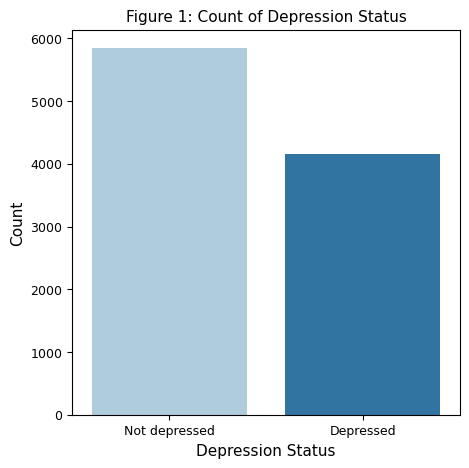

In [176]:
#plotting the count of the depressed vs not depressed students
plt.figure(figsize = (5,5))
fig = sns.countplot(x = 'depression', data = depress_2, palette = 'Paired', 
                    order = depress_2['depression'].value_counts().index)

#title and labels
fig = plt.title('Figure 1: Count of Depression Status', fontsize = 11)

#tick labels and font size
plt.xticks(ticks = [0,1], labels=['Not depressed', 'Depressed'],
          fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel("Depression Status", fontsize = 11)
plt.ylabel("Count", fontsize = 11)

#show the plot
plt.show()

##### Boxplot of Students' Work/Study Hours

The Figure 2 shows the distribution of hours student spend on working or studying in one day. It can be seen that the median work/study time is 8 hours, with the majority of data ranges from 4 to 10. The data is still slightly left-skewed even though looking normally distributed at first sight.

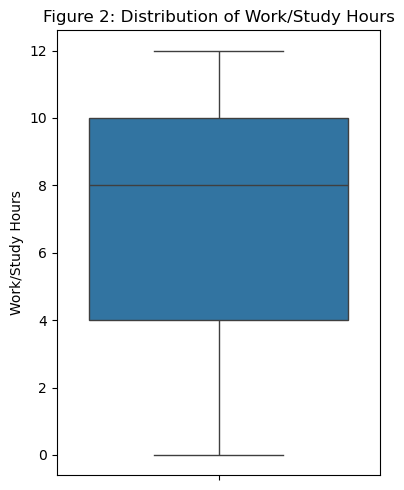

In [200]:
#Plotting the distribution of Work/Study Hours
plt.figure(figsize=(4, 5))
sns.boxplot(data=depress_2, y='work_study_hrs')
plt.title('Figure 2: Distribution of Work/Study Hours')
plt.ylabel('Work/Study Hours')
plt.tight_layout()
plt.show()

##### Histogram of Students' CGPA

Figure 3 on CGPA shows almost every students are recorded with 5 and above CGPA. Specifically, the number of students who gets 9-10 and around 6 in grades exceed the others. This insight may be useful in deciding whether depression status affect the academic performance. However, when the data is highly negatively skewed, performing regression might show inappropriate significant beta coefficient for CGPA. In other words, those with lower CGPA may be mistakenly flagged as depressed by the model.

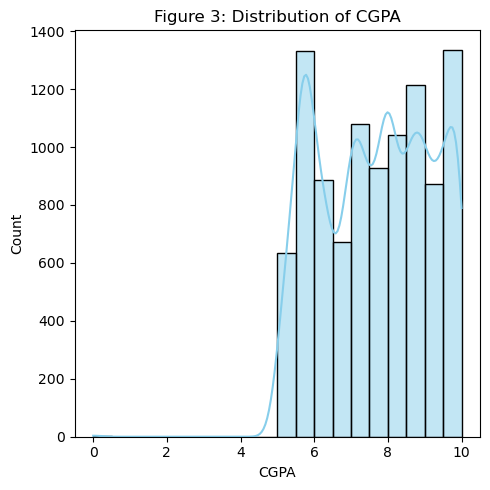

In [57]:
plt.figure(figsize=(5, 5))
sns.histplot(data = depress_2, x = 'cgpa', bins=20, kde=True, color='skyblue')  # `kde=True` adds smooth curve
plt.title('Figure 3: Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 5.2 Two-Variable Visualisation

##### Plot of Depression by Gender

The figure above shows slight variations in the number of depressed student for each gender. There are higher numbers of both depressed and not depressed students for male. This is likely owing to the fact that there are more male students in the dataset. 

Text(0, 0.5, 'Depression Status')

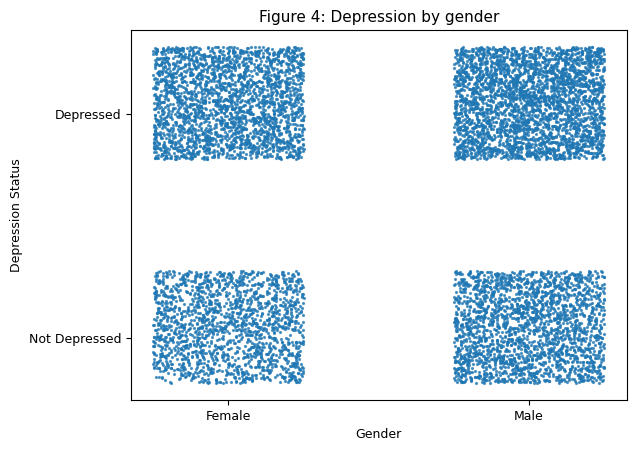

In [60]:
#plotting depression by gender
    #ensuring depression is categorical
plot2_df = depress_2.copy()
plot2_df['depression'] = plot2_df['depression'].astype('category') 
plot2_df['gender'] = plot2_df['gender'].astype('category') 

    #assign numerical values to gender and depression
plot2_df["gender"] = plot2_df["gender"].cat.codes
plot2_df["depression"] = plot2_df["depression"].cat.codes


    #add random noise to make the dots jitter
xnoise, ynoise = np.random.random(len(plot2_df))/2, np.random.random(len(plot2_df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(plot2_df["gender"]+xnoise, plot2_df["depression"]+ynoise, alpha=0.7, s = 1.75)


#changeing ticks
    # Remove all ticks (x and y)
plt.xticks([])  
plt.yticks([])  
    #putting on correct tick values
plt.xticks([0.25, 1.25], ['Female', 'Male'],
          fontsize = 9)
plt.yticks([0.2, 1.2], ['Not Depressed', 'Depressed'],
          fontsize = 9)

#title and labels
fig = plt.title('Figure 4: Depression by gender', fontsize = 11)

#tick labels and font size
plt.xlabel("Gender", fontsize = 9)
plt.ylabel("Depression Status", fontsize = 9)

##### Plot of Depression by Ages

Interestingly, from figure 5, depressed individuals are generally observed to be younger than non-depressed individuals. Particularly, those below age 23 in the dataset tend to be more depressed than not.

Text(0, 0.5, 'Depression Status')

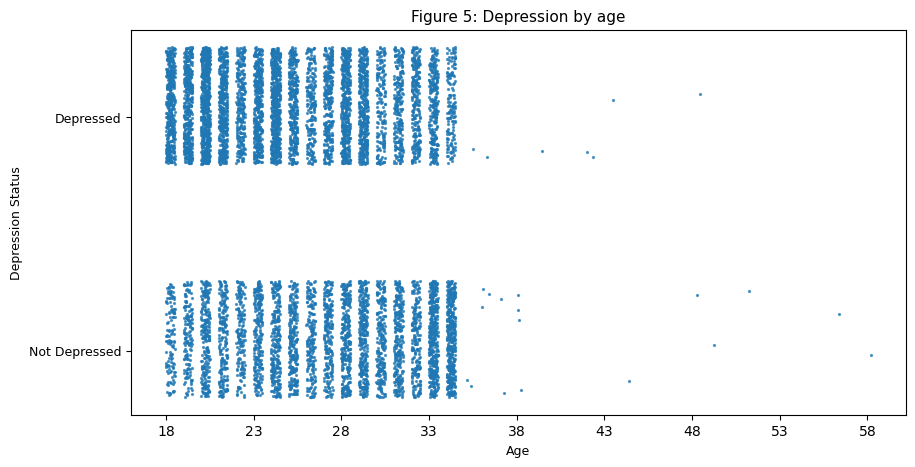

In [62]:
plt.figure(figsize=(10, 5))
#Plotting depression by Ages
    #Ensure depression is categorical
plot2_df['depression'] = plot2_df['depression'].astype('category') 

    #Assign numerical values to depression
plot2_df["depression"] = plot2_df["depression"].cat.codes

    #Ensure age as numeric
plot2_df['age'] = pd.to_numeric(plot2_df['age'], errors='coerce')

#Plot the scatter plot
plt.scatter(
    plot2_df["age"] + xnoise, 
    plot2_df["depression"] + ynoise, 
    alpha=0.7, s=1.75
)

#Change ticks
    #putting on correct tick values
plt.yticks([0.2, 1.2], ['Not Depressed', 'Depressed'],
          fontsize = 9)
plt.xticks(ticks=range(18, 60, 5))

#title and labels
fig = plt.title('Figure 5: Depression by age', fontsize = 11)

#tick labels and font size
plt.xlabel("Age", fontsize = 9)
plt.ylabel("Depression Status", fontsize = 9)

##### Plot of Depression by Academic Pressure

As expected, those experiencing higher academic pressure are seen to be more depressed than those who are not. This difference is seen more clearly between students who experience 1 to 2 academic pressure and students who experience 4 to 5 academic pressure.

Text(0, 0.5, 'Depression Status')

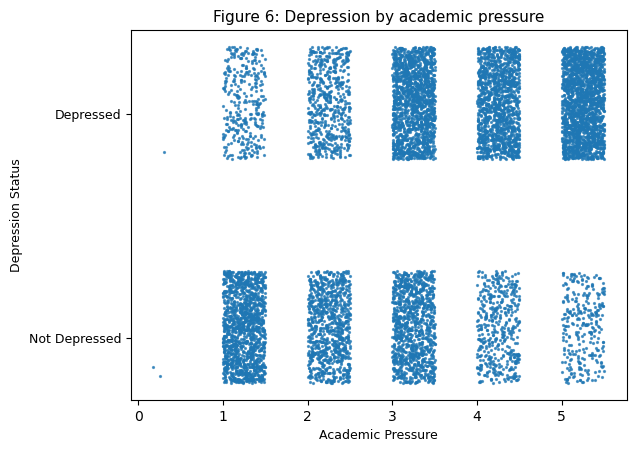

In [64]:
#Plotting depression by Ages
    #Ensure depression is categorical
plot2_df['depression'] = plot2_df['depression'].astype('category') 

    #Assign numerical values to depression
plot2_df["depression"] = plot2_df["depression"].cat.codes

    #Convert academic pressure as numeric
plot2_df['academic_pressure'] = pd.to_numeric(plot2_df['academic_pressure'], errors='coerce')

#Plot the scatter plot
plt.scatter(
    plot2_df["academic_pressure"] + xnoise, 
    plot2_df["depression"] + ynoise, 
    alpha=0.7, s=1.75
)

#Change ticks
    #putting on correct tick values
plt.yticks([0.2, 1.2], ['Not Depressed', 'Depressed'],
          fontsize = 9)

#title and labels
fig = plt.title('Figure 6: Depression by academic pressure', fontsize = 11)

#tick labels and font size
plt.xlabel("Academic Pressure", fontsize = 9)
plt.ylabel("Depression Status", fontsize = 9)

##### Plot of Depression and Suicidal Thoughts

Suicidal is expected to be positively associated with depression. This is evident in the figure below. However, it is also interesting to see that there are more students who have suicidal thoughts but are not depressed than those who do not have suicidal thoughts but are actually depressed.

Text(0, 0.5, 'Depression Status')

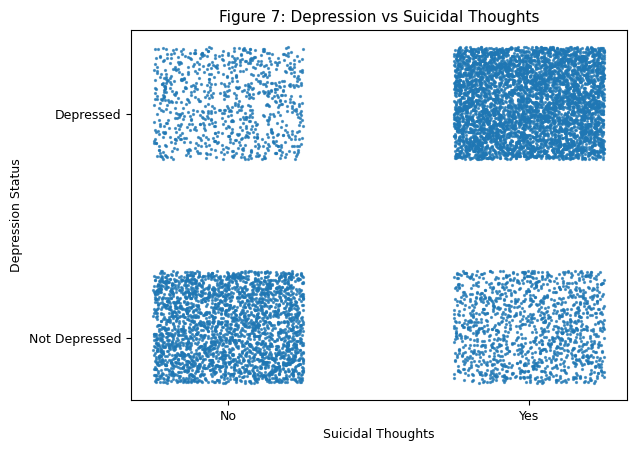

In [66]:
#Plotting depression and suicidal thoughts
    #ensuring depression is categorical
plot2_df = depress_2.copy()
plot2_df['depression'] = plot2_df['depression'].astype('category') 
plot2_df['suicidal_thoughts'] = plot2_df['suicidal_thoughts'].astype('category') 

    #assign numerical values to gender and depression
plot2_df["suicidal_thoughts"] = plot2_df["suicidal_thoughts"].cat.codes
plot2_df["depression"] = plot2_df["depression"].cat.codes


    #add random noise to make the dots jitter
xnoise, ynoise = np.random.random(len(plot2_df))/2, np.random.random(len(plot2_df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(plot2_df["suicidal_thoughts"]+xnoise, plot2_df["depression"]+ynoise, alpha=0.7, s = 1.75)


#changeing ticks
    # Remove all ticks (x and y)
plt.xticks([])  
plt.yticks([])  
    #putting on correct tick values
plt.xticks([0.25, 1.25], ['No', 'Yes'],
          fontsize = 9)
plt.yticks([0.2, 1.2], ['Not Depressed', 'Depressed'],
          fontsize = 9)

#title and labels
fig = plt.title('Figure 7: Depression vs Suicidal Thoughts', fontsize = 11)

#tick labels and font size
plt.xlabel("Suicidal Thoughts", fontsize = 9)
plt.ylabel("Depression Status", fontsize = 9)

### 5.3 Three-Variable Visualisation

##### Job, study satisfaction by degree and depression status

The figure below shows the number of depressed and not depressed students for each combination of job and study satisfaction by their degree. At first glance, one observes that all students generally experience low level of job satistifation and that the numbers of students for each degree are even across all study satisfaction. Closer inspection, however, reveals more students in year 12 having higher study satisfaction but are experiencing depression. Being in year 12 or high school is obviously correlated with age. As such, this implies similar information capture by the plot between age and depression status. This plot indicates that both job and study satisfaction may be insignificant.

<Figure size 500x500 with 0 Axes>

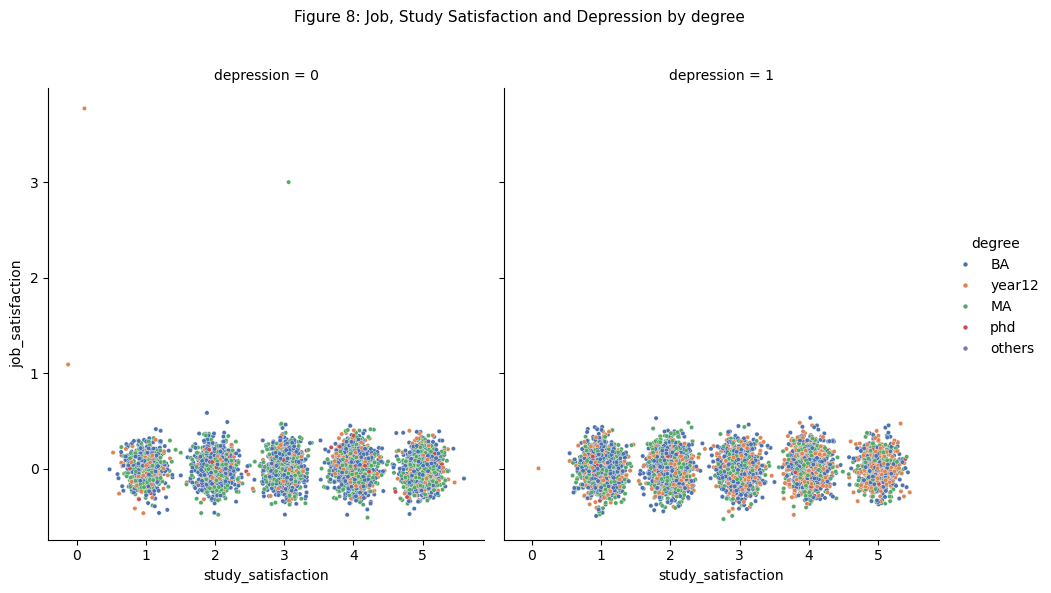

In [224]:
#plotting the count of the depressed vs not depressed students
np.random.seed(139)
#add random noise to make the dots jitter
xnoise, ynoise = np.random.normal(loc=0, scale=0.3, size=len(depress_2))*0.5, np.random.normal(loc=0, scale=0.3, size=len(depress_2))*0.5 # The noise is in the range 0 to 0.5

plt.figure(figsize = (5,5))
fig = sns.relplot(data=depress_2, x=depress_2["study_satisfaction"]+xnoise,
                  y=depress_2["job_satisfaction"]+ynoise,
                  hue = depress_2["degree"],
                  col = "depression",
                 s = 10,
                  height=6,
                  aspect=0.8,
                  palette = "deep"
)

#title and labels
fig.fig.suptitle('Figure 8: Job, Study Satisfaction and Depression by degree', fontsize = 11)
fig.fig.subplots_adjust(top=0.85)

#show the plot
plt.show()

##### Work/Study Hours by Sleep Duration and Depression Status

Figure 9 illustrates the distribution of students by their work or study hours, sleep duration and depression status. Those who are no depressed tend to have lower median work or study hours which is similar across all sleep durations. The plot also seems to imply that although individuals may have more than 7 hours of sleep having more than 8 hours of work or study can still influence their depression status. 

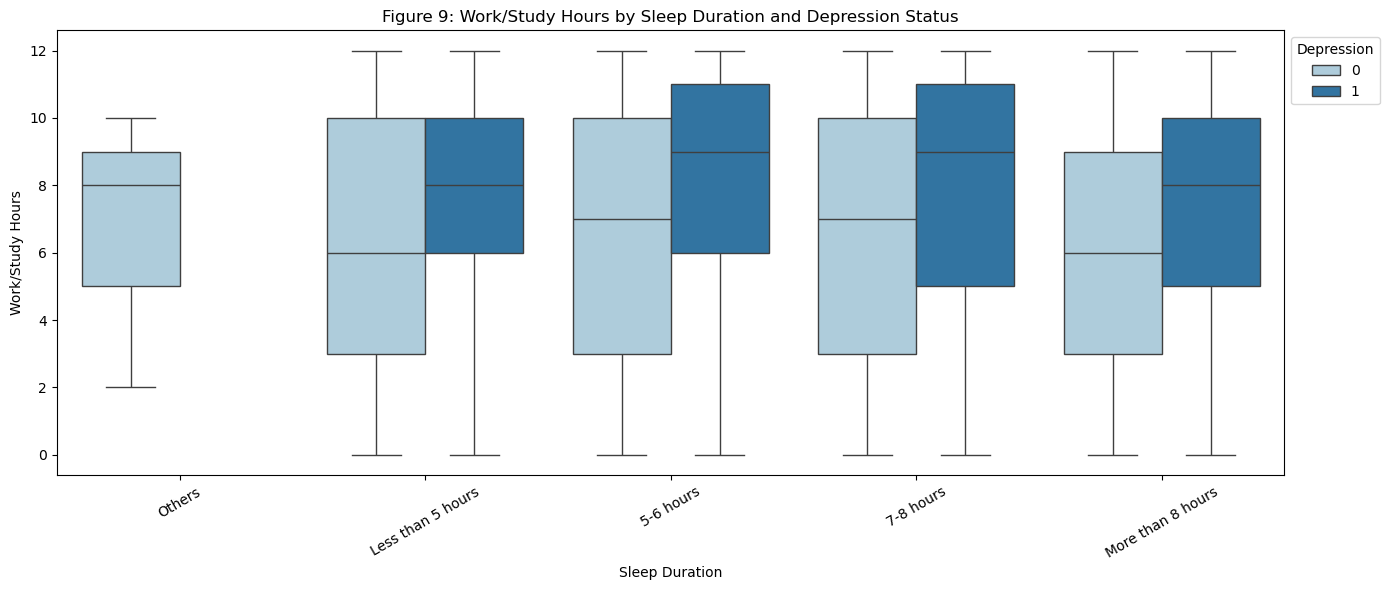

In [241]:
#creating a copy data for the plot
plot3_df = depress_2.copy()

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=plot3_df,
    x='sleep_duration',
    y='work_study_hrs',
    hue='depression',
    palette = "Paired",
    order= ["Others", "Less than 5 hours", "5-6 hours", "7-8 hours", "More than 8 hours"]
)

plt.title('Figure 9: Work/Study Hours by Sleep Duration and Depression Status')
plt.xlabel('Sleep Duration')
plt.ylabel('Work/Study Hours')
plt.xticks(rotation=30)
plt.legend(title='Depression', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Financial stress by dietary habits, sleep hours and depression status

Figure 10 shows the barplot of students by dietary habits, financial stress, sleep duration for different depression status. 

<Figure size 500x500 with 0 Axes>

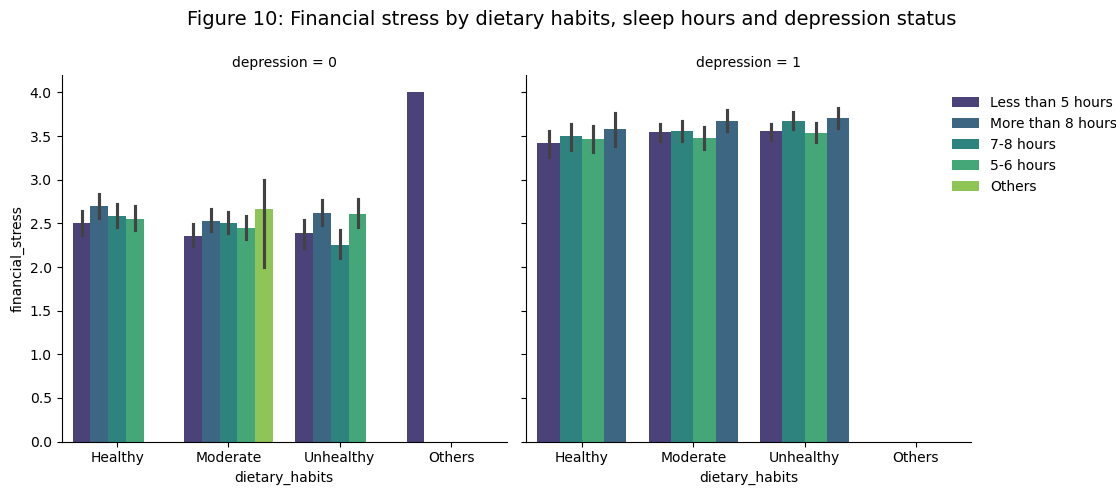

In [283]:
#set color dictionery
unique_sleep = depress_2["sleep_duration"].unique()
palette = sns.color_palette("viridis", n_colors=5)
color_dict = dict(zip(unique_sleep, palette))

#plotting
plt.figure(figsize = (5,5))

fig = sns.FacetGrid(depress_2, col="depression", height=5, aspect=1)
fig.map_dataframe(sns.barplot, "dietary_habits", "financial_stress",
                 hue = "sleep_duration",
                 palette = color_dict)

fig.fig.suptitle('Figure 10: Financial stress by dietary habits, sleep hours and depression status', fontsize=14)
fig.fig.subplots_adjust(top=0.85)
fig.add_legend()
fig.legend.set_bbox_to_anchor((0.96, 0.70))

plt.show()

# 6. Summary & Conclusion

This machine learning project aims to explore the relationships between predictors such as demographic information, lifestyle behaviors and academic performance with depression by fitting a model into a real-world mental health dataset. An accurate predictive model is believed to be beneficial for practically applications that fosters a healthier community in terms of well-being and mental health concerns. The analysis highlights crucial factors that may correlate with depression level, generating insights that support multiple stakeholders in decision-making process,  from not only policymakers and administrators, educational institutions, but also to the students and their family members. 

Specifically speaking about phase 1, the initial step was to undertake preprocessing and cleaning to ensure data integrity and transparency. The columns "ID" and "City" was decided to be removed due to the futile nature of these features in predictability. While "ID" on the one hand might introduce noise and overfitting problems since the unique identifiers are solely arbitrary values with lack predictive power, "City" on the other hand was irrelevant as the model was expected to focus on the mental health conditions of the whole community rather than any specific location. The next step was to handle missing values, outliers, and inconsistent entries. A couples of observations that failed to meet the quality requirement was dropped, while the others were transformed accordingly to achieve consistency throughout the dataset, including variables' names and input values. The data type conversion was also important for the ease of further descriptive and statistical analyses. Eventually, the 27900-observation dataset was randomly sampled down to 10000 to improve the model fitting process with respect to forecasting optimization as well as time efficiency.

Moving onto the data exploration process of phase 1, notable patterns were observed though generating visualizations.Regardless of a large amount of depressed student, it was seen that the negative-skewed distribution of their study/work hours and cgpa might cause them to be mistakenly identified as depressed by the model, which required further considerations. The allocations between depressed and not depressed separated by demographic factors were clearly distinguished, with more male students with depression status than the figure for its opposite gender, and the age groups below 30 tended to exceed the others, increase for those who younger than 23 years old. In accordance with expectation, students experiencing higher academic pressure were likely to suffer from depression, and obviously the records for depressed students with suicidal thoughts were significant substantial. However, it is also interesting to see that the amount of students who have suicidal thoughts but are not depressed outnumbered those who do not have suicidal thoughts but are actually depressed. About lifestyle habits, regardless of sleeping durations, depressed students account for higher median in working and/or studying hours per day than those without severe mental health issues. Depressed ones also recorded a higher financial stress even though having a healthy nutrition practices. 

Hence, the assumption for the degree of depression may not be strongly correlated to their sleeping or dietary habits, however, the stress originated from academic context, particularly expectations, responsibilities or obligations, along with financial hardships may lead to an increased depression level, mostly happening with younger male students. The predictive model in the upcoming phase 2 will be generated to fit the model for further determination of significant predictors, then precisely forecast the mental health conditions.

# Reference

Ajinkya, S., Schaus, J. F., & Deichen, M. (2016). The relationship of undergraduate major and housing with depression in undergraduate students. Cureus, 8(9).

Awadalla, S., Davies, E. B., & Glazebrook, C. (2020). A longitudinal cohort study to explore the relationship between depression, anxiety and academic  performance among Emirati university students. BMC psychiatry, 20, 1-10.

Barrass, L., Joshi, E., Dawe, J., Rubbo, B., Redaniel, M. T., Riglin, L., ... & Knipe, D. (2024). The association between socioeconomic position and depression or suicidal ideation in low-and middle-income countries in Southeast Asia: a systematic review and meta-analysis. BMC Public Health, 24(1), 3507.

Deng, Y., Cherian, J., Khan, N. U. N., Kumari, K., Sial, M. S., Comite, U., ... & Popp, J. (2022). Family and academic stress and their impact on students' depression level and academic performance. Frontiers in psychiatry, 13, 869337.

Hishinuma, E. S., Chang, J. Y., McArdle, J. J., & Hamagami, F. (2012). Potential causal relationship between depressive symptoms and academic achievement in the Hawaiian high schools health survey using contemporary longitudinal latent variable change models. Developmental psychology, 48(5), 1327.

McFarland, M. J., & Wagner, B. G. (2015). Does a college education reduce depressive symptoms in American young adults?. Social Science & Medicine, 146, 75-84.

OpenML (n.d). Student Depression Dataset. Retrieved from: https://www.openml.org/search?type=data&status=active&id=46753&sort=runs

Rana, M. S. R., & Kabir, M. R. (2020, December). Determining Clinical Depression From The Analysis of Socio-Economic Attributes. In 2020 23rd International Conference on Computer and Information Technology (ICCIT) (pp. 1-6). IEEE.

Sharif, M. S., Zorto, A., Kareem, A. T., & Hafidh, R. (2022, November). Effective machine learning based techniques for predicting depression. In 2022 International Conference on Innovation and Intelligence for Informatics, Computing, and Technologies (3ICT) (pp. 366-371). IEEE.

Sinval, J., Oliveira, P., Novais, F., Almeida, C. M., & Telles-Correia, D. (2024). Exploring the impact of depression, anxiety, stress, academic engagement, and dropout intention on medical students' academic performance: A prospective study. Journal of Affective Disorders.

Steare, T., Muñoz, C. G., Sullivan, A., & Lewis, G. (2023). The association between academic pressure and adolescent mental health problems: A systematic review. Journal of affective disorders, 339, 302-317.

Trivedi, N. K., Tiwari, R. G., Witarsyah, D., Gautam, V., Misra, A., & Nugraha, R. A. (2022, November). Machine learning based evaluations of stress, depression, and anxiety. In 2022 International Conference Advancement in Data Science, E-learning and Information Systems (ICADEIS) (pp. 1-5). IEEE.

Tsuno, N., Besset, A., & Ritchie, K. (2005). Sleep and depression. Journal of clinical psychiatry, 66(10), 1254-1269.

Van Sprang, E. D., Maciejewski, D. F., Milaneschi, Y., Elzinga, B. M., Beekman, A. T., Hartman, C. A., ... & Penninx, B. W. (2022). Familial risk for depressive and anxiety disorders: associations with genetic, clinical, and psychosocial vulnerabilities. Psychological Medicine, 52(4), 696-706.

Virtanen, M., Ferrie, J. E., Singh-Manoux, A., Shipley, M. J., Stansfeld, S. A., Marmot, M. G., ... & Kivimäki, M. (2011). Long working hours and symptoms of anxiety and depression: a 5-year follow-up of the Whitehall II study. Psychological medicine, 41(12), 2485-2494.

Zulfiker, M. S., Kabir, N., Biswas, A. A., Nazneen, T., & Uddin, M. S. (2021). An in-depth analysis of machine learning approaches to predict depression. Current research in behavioral sciences, 2, 100044.

In [1]:
!jupyter nbconvert --to html Assignment139.ipynb

Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Scripts\jupyter-nbconvert-script.py", line 6, in <module>
    from nbconvert.nbconvertapp import main
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 193, in <module>
    class NbConvertApp(JupyterApp):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 252, in NbConvertApp
    Options include {get_export_names()}.
                     ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\nbconvert\exporters\base.py", line 145, in get_export_names
    e = get_exporter(exporter_name)(config=config)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\nbconvert\exporters\base.py", line 106, in get_exporter
    exporter = items[0].load()
               ^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\importlib\metadata\__init__.py", line 202, in load
    module = import_module(match.group('module'))
       